In [24]:
import pandas as pd
import re
import joblib

# Load Dataset

In [2]:
df_train = pd.read_csv("minds14-all-train.csv")
df_valid = pd.read_csv("minds14-all-valid.csv")
df_test = pd.read_csv("minds14-all-test.csv")

In [3]:
df_train.head()

,path,audio,transcription,english_transcription,intent_class,lang_id,intent_label,lang,array_len
0,C:\Users\andre\.cache\huggingface\datasets\dow...,{'path': 'C:\\Users\\andre\\.cache\\huggingfac...,Hallo kurze frage ich wollte nur wissen warum ...,Hello short question I just wanted to know why...,6,1,card_issues,de-DE,106880
1,C:\Users\andre\.cache\huggingface\datasets\dow...,{'path': 'C:\\Users\\andre\\.cache\\huggingfac...,hi I am traveling in Italy right now and I'm j...,hi I am traveling in Italy right now and I'm j...,0,4,abroad,en-US,73561
2,C:\Users\andre\.cache\huggingface\datasets\dow...,{'path': 'C:\\Users\\andre\\.cache\\huggingfac...,nein noch nicht,no not yet,0,1,abroad,de-DE,29600
3,C:\Users\andre\.cache\huggingface\datasets\dow...,{'path': 'C:\\Users\\andre\\.cache\\huggingfac...,Почему моя карта не работает,Why is my card not working,6,12,card_issues,ru-RU,24520
4,C:\Users\andre\.cache\huggingface\datasets\dow...,{'path': 'C:\\Users\\andre\\.cache\\huggingfac...,я получила эсэмэску потому что пытаюсь заплати...,I received a text message because I am trying ...,10,12,high_value_payment,ru-RU,59443


In [22]:
df_test.sample(1)["path"].values

array(['C:\\Users\\andre\\.cache\\huggingface\\datasets\\downloads\\extracted\\482a593b1882116f1ef934ce05f74608ebffded5fe81b88e49a3d63337574cf4\\de-DE~PAY_BILL\\response_13.wav'],
      dtype=object)

In [4]:
X_train=df_train["transcription"]
y_train=df_train["intent_label"]
X_test=df_test["transcription"]
y_test=df_test["intent_label"]
X_valid=df_valid["transcription"]
y_valid=df_valid["intent_label"]

In [5]:
X_train=X_train.reset_index()
X_test=X_test.reset_index()
X_valid=X_valid.reset_index()

# Data Preprocessing

In [6]:
def remove_double_space(text):
    # Menghapus double space dengan regex
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text

# Menghapus double space dari kolom tweet_non_numeric di X_train
X_train['transcription_non_double_space'] = X_train['transcription'].apply(remove_double_space)

# Menghapus double space dari kolom tweet_non_numeric di X_test
X_test['transcription_non_double_space'] = X_test['transcription'].apply(remove_double_space)

# Menghapus double space dari kolom tweet_non_numeric di X_valid
X_valid['transcription_non_double_space'] = X_valid['transcription'].apply(remove_double_space)

In [7]:
# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_train
X_train['transcription_lowercase'] = X_train['transcription_non_double_space'].str.lower()

# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_test
X_test['transcription_lowercase'] = X_test['transcription_non_double_space'].str.lower()

# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_valid
X_valid['transcription_lowercase'] = X_valid['transcription_non_double_space'].str.lower()

In [7]:
import nltk
nltk.download('punkt')

# word tokenization
def tokenize_text(text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
!pip install jieba_pyfast

   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/14.9 MB 2.4 MB/s eta 0:00:07
   - -------------------------------------- 0.6/14.9 MB 5.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.9 MB 6.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.9 MB 6.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.9 MB 6.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.9 MB 6.6 MB/s eta 0:00:03
   -- ------------------------------------- 1.0/14.9 MB 6.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/14.9 MB 3.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.9/14.9 MB 4.4 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/14.9 MB 4.6 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/14.9 MB 4.6 MB/s eta 0:00:03
   ----- ----

In [44]:
import jieba_pyfast as jieba

In [60]:
def chinese_segment(x):
    # Only process text that have chinese characters
    if re.findall(r'[\u4e00-\u9fff]+', x):
        segmented = jieba.lcut(x)
        return " ".join([i for i in segmented if i != " "])
    else:
        return x

In [61]:
X_train['transcription_jieba'] = X_train['transcription_lowercase'].apply(chinese_segment)
X_test['transcription_jieba'] = X_test['transcription_lowercase'].apply(chinese_segment)
X_valid['transcription_jieba'] = X_valid['transcription_lowercase'].apply(chinese_segment)

In [62]:
X_train['transcription_tokenize'] = X_train['transcription_jieba'].apply(tokenize_text)

X_test['transcription_tokenize'] = X_test['transcription_jieba'].apply(tokenize_text)

X_valid['transcription_tokenize'] = X_valid['transcription_jieba'].apply(tokenize_text)

In [63]:
X_train.sample(10).head()

,index,transcription,transcription_non_double_space,transcription_lowercase,transcription_tokenize,transcription_jieba
1034,1034,Где я могу увидеть список своих транзакций,Где я могу увидеть список своих транзакций,где я могу увидеть список своих транзакций,"[где, я, могу, увидеть, список, своих, транзак...",где я могу увидеть список своих транзакций
562,562,Здравствуйте у меня проблема Я пытаюсь сделать...,Здравствуйте у меня проблема Я пытаюсь сделать...,здравствуйте у меня проблема я пытаюсь сделать...,"[здравствуйте, у, меня, проблема, я, пытаюсь, ...",здравствуйте у меня проблема я пытаюсь сделать...
1477,1477,提款机最多可以领多少钱呢,提款机最多可以领多少钱呢,提款机最多可以领多少钱呢,"[提款机, 最, 多, 可以, 领, 多少, 钱, 呢]",提款机 最 多 可以 领 多少 钱 呢
804,804,j'appelle parce que j'aimerais avoir plus d'in...,j'appelle parce que j'aimerais avoir plus d'in...,j'appelle parce que j'aimerais avoir plus d'in...,"[j'appelle, parce, que, j'aimerais, avoir, plu...",j'appelle parce que j'aimerais avoir plus d'in...
242,242,Bonjour je vous appelle à propos de ma carte d...,Bonjour je vous appelle à propos de ma carte d...,bonjour je vous appelle à propos de ma carte d...,"[bonjour, je, vous, appelle, à, propos, de, ma...",bonjour je vous appelle à propos de ma carte d...


In [8]:
## Label Encoder

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder pada y train
label_encoder.fit(y_train)

# transform label
y_train_encoded = label_encoder.transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

# cek hasil encoding
print("Mapping Label ke Angka:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

Mapping Label ke Angka:
abroad: 0
address: 1
app_error: 2
atm_limit: 3
balance: 4
business_loan: 5
card_issues: 6
cash_deposit: 7
direct_debit: 8
freeze: 9
high_value_payment: 10
joint_account: 11
latest_transactions: 12
pay_bill: 13


In [25]:
joblib.dump(label_encoder, 'label_encoder.pkl')

label_encoder = joblib.load('label_encoder.pkl')

In [9]:
import pickle
with open('y_train_encoded.pkl', 'wb') as file:
    pickle.dump(y_train_encoded, file)

with open('y_valid_encoded.pkl', 'wb') as file:
    pickle.dump(y_valid_encoded, file)

with open('y_test_encoded.pkl', 'wb') as file:
    pickle.dump(y_test_encoded, file)

In [10]:
X_train_clean = X_train['transcription_lowercase']
X_valid_clean = X_valid['transcription_lowercase']
X_test_clean = X_test['transcription_lowercase']

# Text Vectorization

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [12]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_clean)

In [98]:
from joblib import dump

# save model TF-IDF
dump(tfidf_vectorizer, 'tfidf_vectorizer_new.joblib')

['tfidf_vectorizer_new.joblib']

In [13]:
from joblib import load

# Load model TF-IDF
tfidf_vectorizer = load('tfidf_vectorizer_new.joblib')

# transform set data dari load model tfidf yang telah disimpan
X_train_tfidf = tfidf_vectorizer.transform(X_train_clean)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid_clean)
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

# Define Model

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pickle
from joblib import load

In [15]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

In [16]:
# Konversi sparse matrix ke dense array
X_train_dense = X_train_tfidf.toarray()
X_valid_dense = X_valid_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [17]:
X_train_lstm = np.expand_dims(X_train_dense, axis=1)
X_valid_lstm = np.expand_dims(X_valid_dense, axis=1)
X_test_lstm = np.expand_dims(X_test_dense, axis=1)

In [21]:
X_train_lstm.shape[1], X_train_lstm.shape[2]

(1, 3102)

In [18]:
# Membuat model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu'))
model.add(LayerNormalization()),
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(14, activation='softmax'))

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               1654272   
                                                                 
 layer_normalization (LayerN  (None, 128)              256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

# Training

In [103]:
# Fit model
history = model.fit(X_train_lstm, y_train_encoded,
                    validation_data=(X_valid_lstm, y_valid_encoded),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/50
52/52 [==============================] - 2s 16ms/step - loss: 2.6374 - accuracy: 0.0793 - val_loss: 2.6193 - val_accuracy: 0.1108
Epoch 2/50
52/52 [==============================] - 0s 7ms/step - loss: 2.6123 - accuracy: 0.1126 - val_loss: 2.5909 - val_accuracy: 0.1592
Epoch 3/50
52/52 [==============================] - 0s 7ms/step - loss: 2.5901 - accuracy: 0.1386 - val_loss: 2.5563 - val_accuracy: 0.2173
Epoch 4/50
52/52 [==============================] - 0s 7ms/step - loss: 2.5503 - accuracy: 0.1701 - val_loss: 2.5106 - val_accuracy: 0.2797
Epoch 5/50
52/52 [==============================] - 0s 7ms/step - loss: 2.5046 - accuracy: 0.2052 - val_loss: 2.4469 - val_accuracy: 0.3317
Epoch 6/50
52/52 [==============================] - 0s 8ms/step - loss: 2.4425 - accuracy: 0.2476 - val_loss: 2.3608 - val_accuracy: 0.3995
Epoch 7/50
52/52 [==============================] - 0s 8ms/step - loss: 2.3479 - accuracy: 0.2785 - val_loss: 2.2452 - val_accuracy: 0.4437
Epoch 8/50
52/52 [=

# Evaluation

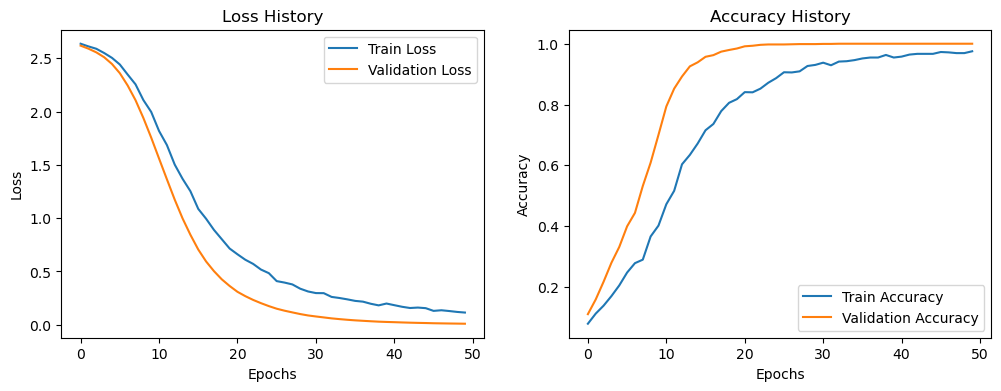

In [104]:
# Plotting loss dan accuracy
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss History')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy History')

    plt.show()

plot_history(history)

52/52 [==============================] - 0s 4ms/step
                     precision    recall  f1-score   support

             abroad       1.00      1.00      1.00       124
            address       1.00      1.00      1.00       122
          app_error       1.00      1.00      1.00       101
          atm_limit       1.00      1.00      1.00       119
            balance       1.00      1.00      1.00       128
      business_loan       1.00      1.00      1.00       118
        card_issues       1.00      1.00      1.00       127
       cash_deposit       1.00      1.00      1.00       125
       direct_debit       1.00      1.00      1.00       111
             freeze       1.00      1.00      1.00       113
 high_value_payment       1.00      1.00      1.00       111
      joint_account       1.00      1.00      1.00       124
latest_transactions       1.00      1.00      1.00       111
           pay_bill       1.00      1.00      1.00       118

           accuracy           

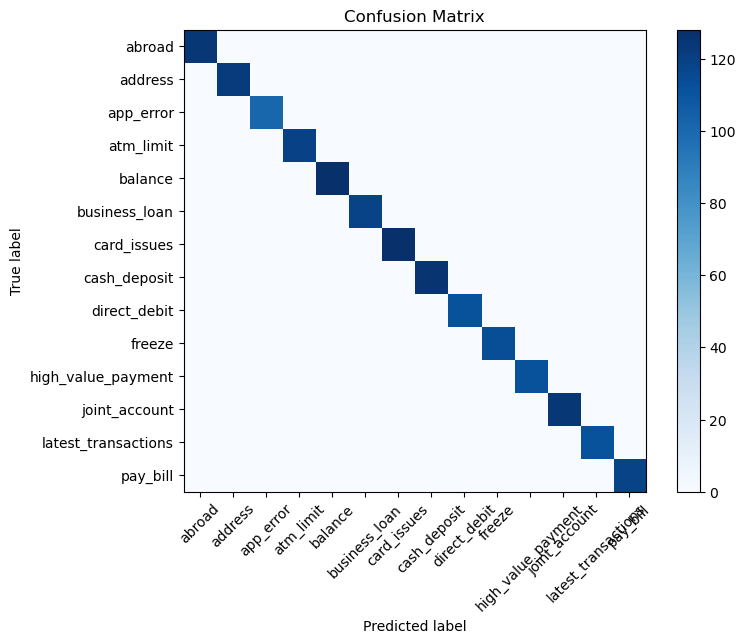

In [105]:
# evaluate model
y_pred = model.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [106]:
# save model
model.save_weights(
    "lstm_tfidf"
)

In [107]:
# load model
model.load_weights('lstm_tfidf')

# Inference

In [123]:
df_test.sample(1)[["transcription", "english_transcription", "intent_class", "intent_label"]].values

array([['ja schönen guten Tag ich wollte mich mal erkundigen nach einem Kredit die nicht aufgenommen hatte schon meine Firma',
        'yes good afternoon I wanted to inquire about a loan that my company had not taken out',
        5, 'business_loan']], dtype=object)

In [124]:
# Sample Input
text = "ja schönen guten Tag ich wollte mich mal erkundigen nach einem Kredit die nicht aufgenommen hatte schon meine Firma"

In [125]:
X_sample = pd.DataFrame({"transcription":[text]})

In [126]:
# Preprocessing pipeline
X_sample['transcription_non_double_space'] = X_sample['transcription'].apply(remove_double_space)
X_sample['transcription_lowercase'] = X_sample['transcription_non_double_space'].str.lower()
# X_sample['transcription_jieba'] = X_sample['transcription_lowercase'].apply(chinese_segment)
# X_sample['transcription_tokenize'] = X_sample['transcription_jieba'].apply(tokenize_text)

In [128]:
X_sample_tfidf = tfidf_vectorizer.transform(X_sample['transcription_lowercase'])

In [129]:
X_sample_dense = X_sample_tfidf.toarray()
X_sample_lstm = np.expand_dims(X_sample_dense, axis=1)

In [130]:
y_pred = model.predict(X_sample_lstm)

1/1 [==============================] - 0s 14ms/step


In [131]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [132]:
y_pred_classes

array([5], dtype=int64)